## TANZANIA WATER PROJECT



# Objective of the study

   #  Overview 

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether. Addressing the persistent water problem involves classifying wells as functional or non-functional to provide actionable insights for stakeholders, particularly the governments and NGO's. 

This project aims to identify key factors that influence well functionality such as maybe the age of wells, payment methods for maintenance, and even the role of community involvement. 

Preliminary findings suggest that newer wells may possibly exhibit fewer faults, indicating apotential need for investment in modern infrastructure. Additionally, efficient payment methods to enhance the well maintenance which are probably fascilitated by technology appear to enhance well upkeep. And lastly community involvement in maintenance practices could help boost sustainability and even operational efficiency of the wells. By focusing on areas like these, the government could develop targted interventions to ensure reliable water access across Tanzania.


# Objectives
1. To identify which payment methods best contribute to maintenance of the wells.

2. To distinguish the different factors that contribute to functionality of the wells in Tanzania.

3. To find the best classification method for analysing the dataset.


# Data description
The datasets obtained were from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/ of which provided four datasets whereby
we had 

* Submission format which was the format of submitting the predictions, 

* Test set values which contained the independent variables that need prediction,

* Training set labels which contains the dependent variable (status_group) for each of the rows in Training set values and lastly the

* Training set values which contains the independent variables for the training set

Some of the features in this dataset are:

amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint



we also have the labels in the dataset whic are;

functional - the waterpoint is operational and there are no repairs needed

functional needs repair - the waterpoint is operational, but needs repairs

non functional - the waterpoint is not operational

Some of these features will be considered highly useful in trying to answer the ibjectives of the projcet while others may dropped to avoid using a heavy dataset.

# Stakeholder
The stakeholders of this project are the Government Ministry of water & NGO's that will find this information useful in order to decide on which wells to repair and how much to allocate to each of them as well as help them identify which sources are best for the wells, what mode of payments to focus on for high efficiency and if they should involve the local communities.

In [1]:
# we start by importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import tree


In [2]:
#lets first view all the datasets to confirm on what they entail
df1 = pd.read_csv("Training set labels.csv") #this is the target class dataset
df2 = pd.read_csv("Test set values.csv") #most likely the dataset from outside to be used for testing
df3 = pd.read_csv("Training set values.csv")

In [3]:
df1.head()
#we cann see this is our target class or rather the dependent variables

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
df2.head()
#We see that these are the independent variables that need predictions but under the test dataset provided already.

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
df3.head()
#these are the independent variables for the training set hence we will merge this datset with the target variables.

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
df3.info() #we have 40 columns so we should have 41 columns when we merge it with the features column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:

data = pd.merge (df1, df3, on='id') #after combining we still have 59400 entries but an additional one column which is good.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

The target feature in this dataset is the 'status_group' feature as it is an indicator of whether or not a well is functional non-functional or needs repair.
Also this are some of the features we are going to use:

.amount_tsh: Amount water available to waterpoint

.population - Population around the well

.date_recorded: The date the row was entered

.funder: Who funded the well

.gps_height: Altitude of the well

.installer: Organization that installed the well

.longitude: GPS coordinate

.latitude: GPS coordinate

.wpt_name: Name of the waterpoint if there is 

.payment_type - What the water costs

.management_group - How the waterpoint is managed

.public_meeting - True/False

And many others




## Data cleaning

In [8]:
#we will use a function 
def data_cleaning_result(df):
    """
    To try and generate a report of missing values and duplicate rows in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to be checked.

    Returns:
    None: Prints the report.
    """
    # here, I calculate the percentage of missing values for each column
    missing_percentage = (df.isnull().sum() * 100 /len(df)).round(2)
    missing_percentage = missing_percentage[missing_percentage > 0]

    #display the missing percentage for each column
    if not missing_percentage.empty:
        print('Missing values percentage:')
        print(missing_percentage) #to print the missing percentage of each column
    else:
        print("No missing values have been found.")

    #checking for duplicates
    duplicates = df.duplicated()
    number_duplicates = duplicates.sum()

    #Display the number of dulicate rows
    print(f"\nNumber of duplicate rows: {number_duplicates}")

    # Optionally, display the duplicate rows if they exist
    if number_duplicates > 0:
        duplicate_rows = df[duplicates]
        print("\nDuplicate rows:")
        print(duplicate_rows)

# Assuming your merged dataset is called 'data'
# Generate the data cleaning report
data_cleaning_result(data)
    


Missing values percentage:
funder                6.12
installer             6.15
subvillage            0.62
public_meeting        5.61
scheme_management     6.53
scheme_name          47.42
permit                5.14
dtype: float64

Number of duplicate rows: 0


The percentages don't seem to be that high while our highest percentage of missing values is scheme_name, we may not even need that column. We ca nthen move forward with our cleaning we will eventually deal with these columns later on.

In [9]:
# Convert the 'status_group' column to a categorical data type so that it can be easily converted into numerical codes later
data['status_group'] = data['status_group'].astype('category')

# Convert the categorical values into numerical codes and creating  a new column
data['target'] = data['status_group'].cat.codes

# Display the counts of each numerical code in the 'target' column
data['target'].value_counts()

0    32259
2    22824
1     4317
Name: target, dtype: int64

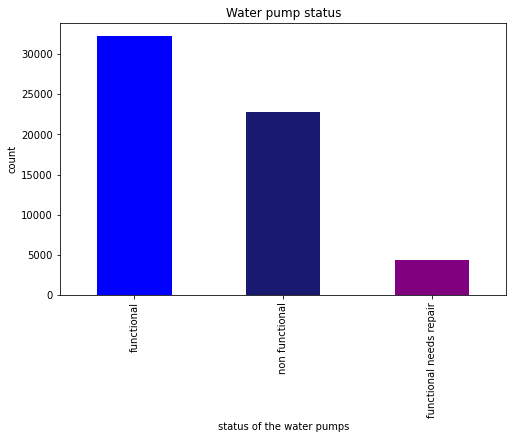

In [10]:
#Now i want to plot them 
data['status_group'].value_counts().plot(kind = 'bar',figsize= (8,5), color=['blue', 'midnightblue', 'purple'])
plt.title('Water pump status')
plt.xlabel('status of the water pumps')
plt.ylabel ('count')
plt.show()



Clearly there is quite animbalance amongst the three classes hence I will therefore combine the non-functional and functional needs repair into one class so that eventually we can drop the status group and use the target column.

In [11]:
# Replace "functional needs repair" and "non functional" with "needs repair" in the 'status_group' column
data['status_group'] = data['status_group'].replace(to_replace=["functional needs repair", "non functional"], value="needs repair")

# Display the value counts of each category in the 'status_group' column after replacement
data['status_group'].value_counts()

functional      32259
needs repair    27141
Name: status_group, dtype: int64

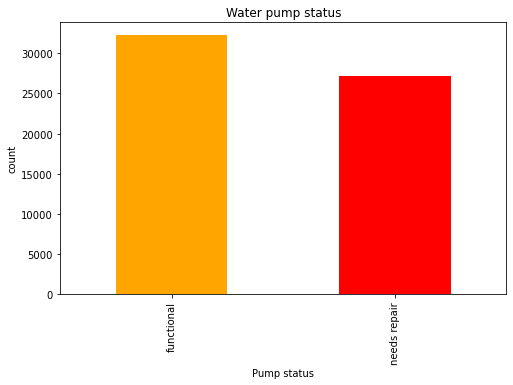

In [12]:
#Now let's plot the new features we have after combining the two groups to see what we have.
data['status_group'].value_counts().plot(kind= 'bar', figsize= (8,5), color=['Orange', 'red'])
plt.title('Water pump status')
plt.xlabel('Pump status')
plt.ylabel('count')
plt.show()

In [13]:
# Convert the 'status_group' column to a categorical data type
data['status_group'] = data['status_group'].astype('category')

# Convert the categorical values into numerical codes
data['target'] = data['status_group'].cat.codes

# Display the counts of each numerical code in the 'target' column
data['target'].value_counts()

0    32259
1    27141
Name: target, dtype: int64

In [14]:
data.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,67743,needs repair,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


In [15]:
# Calculate the relative frequency of each unique value in the 'status_group' column
data['status_group'].value_counts(normalize=True)

functional      0.543081
needs repair    0.456919
Name: status_group, dtype: float64

We are going to use these numbers as a baseline when comparing subgroups. For example,if a region has less than 54% functionality, we know they are below average and some features within that region are affecting the functionality of the wells.

This will help us identify important features more easily, and give us references for further data exploration.

In [16]:
# here there will be the creation of  dummies for status group to make plotting easier
dummies_status = pd.get_dummies(data['status_group'])
data = data.join(dummies_status) #so that I can add the dummy variables back to the original dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     59400 non-null  int64   
 1   status_group           59400 non-null  category
 2   amount_tsh             59400 non-null  float64 
 3   date_recorded          59400 non-null  object  
 4   funder                 55765 non-null  object  
 5   gps_height             59400 non-null  int64   
 6   installer              55745 non-null  object  
 7   longitude              59400 non-null  float64 
 8   latitude               59400 non-null  float64 
 9   wpt_name               59400 non-null  object  
 10  num_private            59400 non-null  int64   
 11  basin                  59400 non-null  object  
 12  subvillage             59029 non-null  object  
 13  region                 59400 non-null  object  
 14  region_code            59400 non-null 

# Data exploration

Plotting of functions for the categorical variables

In [17]:
# Define a function named plot_percent with one parameter: col (column name)
#Basically trying to represent the column name I want to compare the mean functionalities against.
def plot_percent(col):
    if data[col].nunique() > 4:
        rows, cols, width, height = 2, 1, 12 if data[col].nunique() > 12 else data[col].nunique(), 14
    else:
        rows, cols, width, height = 1, 2, 12, 3
     # Create a new figure with subplots based on the determined layout
    fig, ax = plt.subplots(rows, cols, figsize=(width, height))
        
    for idx, status in enumerate(data['status_group'].unique().tolist()):
        data.groupby(col).mean()[status].sort_values().plot.bar(ax=ax[idx])
        ax[idx].axhline(y=data[status].mean(), color='r', linestyle='-')
        ax[idx].set_title(f"{status.title()} pumps by {col.title()}", fontsize=14)
        ax[idx].set_ylabel('Percent')
        ax[idx].set_xlabel('')
        ax[idx].set_ylim(0, data.groupby(col).mean()[status].max() * 1.2)
    
    fig.tight_layout()


In [18]:
#Let's now analyze those misisng variables we found before
def analyze_column(data,column):
    """
    Analyze a specified column:
    - Get the missing values count
    - Get the unique values
    - Count occurrences of '0' as a possible placeholder for missing values
    - Display the top 20 most frequent values

    Args:
        data (pd.DataFrame): DataFrame containing the specified column
        column (str): Name of the column to analyze

    Returns:
        None: Prints the analysis results
    """
    #to get the missing values count 
    missing_values_count = data[column].isnull().sum() 
    print(f"Missing Values: {missing_values_count}/{len(data)}")


    #To get the unique values
    num_unique_values = data[column].nunique()
    print(f"\nNumber of Unique Values in '{column}': {num_unique_values}")

    # Count occurrences of '0' as a possible placeholder for missing values
    zero_count = (data[column] == '0').sum()
    print(f"\nCount of '0' as Placeholder for Missing Values in '{column}': {zero_count}")

    #To display the top 20 most frequent values
    print(f"\nTop 20 Most Frequent Values in '{column}':")
    print(data[column].value_counts().head(20))

# Example usage:
analyze_column(data, 'installer')

Missing Values: 3655/59400

Number of Unique Values in 'installer': 2145

Count of '0' as Placeholder for Missing Values in 'installer': 777

Top 20 Most Frequent Values in 'installer':
DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
World vision            408
LGA                     408
WEDECO                  397
TASAF                   396
District council        392
Name: installer, dtype: int64


In [19]:
analyze_column(data, 'funder')

Missing Values: 3635/59400

Number of Unique Values in 'funder': 1897

Count of '0' as Placeholder for Missing Values in 'funder': 777

Top 20 Most Frequent Values in 'funder':
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64


We see that DWE (District Water Engineering) and Govt are the major installers which is similar to our funders.

In [20]:
# Grouping the data by multiple categorical variables and performing aggregation on target variables
data.groupby(['basin', 'region', 'region_code', 'district_code', 'lga', 'ward', 'subvillage'])[
    ['functional', 'needs repair']].agg(['mean','sum']).head()


functional  \
                                                                            mean   
basin    region region_code district_code lga     ward     subvillage              
Internal Arusha 2           1             Monduli Engaruka Hyhh              0.0   
                                                           Madukani          0.0   
                                                           Mkaoo             0.0   
                                                           Mula              0.0   
                                                           Mwembeni          0.0   

                                                                           \
                                                                      sum   
basin    region region_code district_code lga     ward     subvillage       
Internal Arusha 2           1             Monduli Engaruka Hyhh         0   
                                                           Madukani     0   
                                                           Mkaoo        0   
                                                           Mula         0   
                                                           Mwembeni     0   

                                                                      needs repair  \
                                                                              mean   
basin    region region_code district_code lga     ward     subvillage                
Internal Arusha 2           1             Monduli Engaruka Hyhh                1.0   
                                                           Madukani            1.0   
                                                           Mkaoo               1.0   
                                                           Mula                1.0   
                                                           Mwembeni            1.0   

                                                                           
                                                                      sum  
basin    region region_code district_code lga     ward     subvillage      
Internal Arusha 2           1             Monduli Engaruka Hyhh         1  
                                                           Madukani     1  
                                                           Mkaoo        3  
                                                           Mula         1  
                                                           Mwembeni     1

For this group, the mean and sum of the 'functional' variable are 0.0 and 0, respectively, indicating that none of the water pumps in this group are functional. Similarly, the mean and sum of the 'needs repair' variable are 1.0 and 1, respectively, indicating that all water pumps in this group need repair.

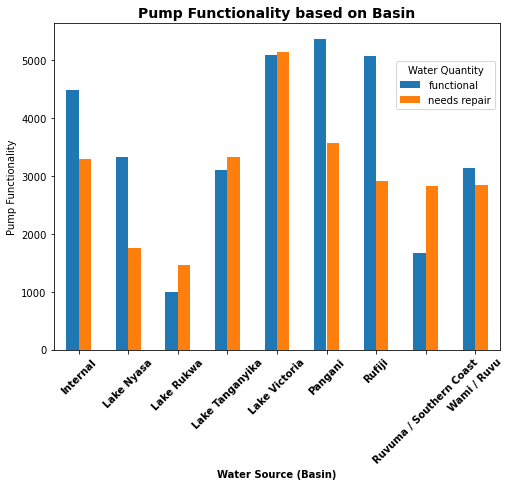

In [21]:
#Here I have tried grouping the data by 'basin' and 'status_group', and then unstacking the results to make it suitable for plotting
sub_df = data.groupby('basin')['status_group'].value_counts(ascending=True).unstack()

# Plotting the DataFrame using a bar plot
sub_df.plot(kind='bar', figsize=(8,6))

# Adding labels to the x-axis, y-axis, and title
plt.xlabel("Water Source (Basin)", fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.ylabel("Pump Functionality")
plt.title('Pump Functionality based on Basin', fontsize=14, fontweight='bold')

# Adding a legend with a custom location and title
plt.legend(bbox_to_anchor=(1.0, 0.9), title='Water Quantity');

The basins that seem to be more reliable are Rufiji, Pangani and Nyasa this is because they seem to have a higher number of functional water sources compared to the non-functional.

In [22]:
#let's analyze the public meeting
analyze_column(data, 'public_meeting')

Missing Values: 3334/59400

Number of Unique Values in 'public_meeting': 2

Count of '0' as Placeholder for Missing Values in 'public_meeting': 0

Top 20 Most Frequent Values in 'public_meeting':
True     51011
False     5055
Name: public_meeting, dtype: int64


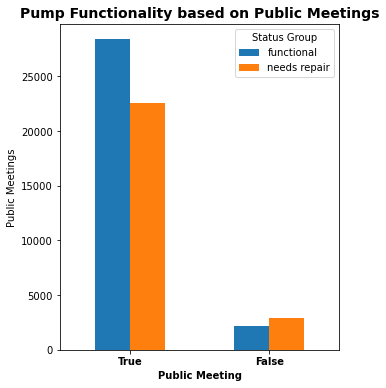

In [23]:
#let's group the data by public meeting and status group and then unstack the results for plotting
sub_df = data.groupby('public_meeting')['status_group'].value_counts(ascending= False).unstack()

sub_df.sort_values(by='public_meeting', ascending=False).plot(kind='bar', figsize=(5,6))


# Adding labels to the x-axis, y-axis, and a title
plt.xlabel("Public Meeting", fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')  # Rotating x-axis labels for better readability
plt.ylabel("Public Meetings")
plt.title('Pump Functionality based on Public Meetings', fontsize=14, fontweight='bold')

# Adding a legend with a custom location and title
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Status Group');

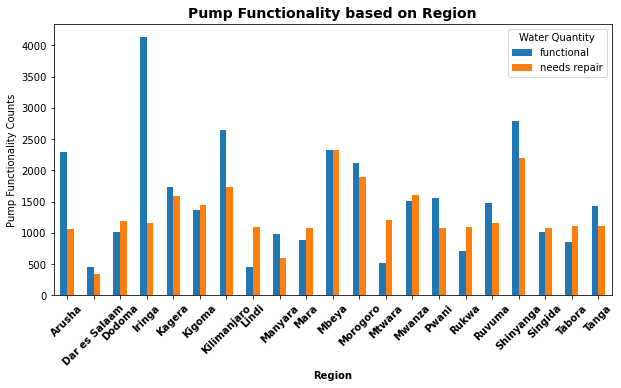

In [24]:
# Grouping the data by 'region' and 'status_group', and then unstacking the results to make it suitable for plotting
sub_df = data.groupby('region')['status_group'].value_counts(ascending=True).unstack()

# Plotting the DataFrame using a bar plot
sub_df.plot(kind='bar', figsize=(10,5))

# Adding labels to the x-axis, y-axis, and a title
plt.xlabel("Region", fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')  # Rotating x-axis labels for better readability
plt.ylabel("Pump Functionality Counts")
plt.title('Pump Functionality based on Region', fontsize=14, fontweight='bold')

# Adding a legend with a custom location and title
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Water Quantity');

Iringa region seems to have a good number of functioning pumps compared to the other regions.

In [25]:
# Analyzing the 'management' variable
analyze_column(data, 'management')

Missing Values: 0/59400

Number of Unique Values in 'management': 12

Count of '0' as Placeholder for Missing Values in 'management': 0

Top 20 Most Frequent Values in 'management':
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64


In [26]:
# Grouping the data by 'management_group' and 'management', and then calculating the mean of 'functional' and 'needs repair' variables
data.groupby(['management_group', 'management'])[['functional', 'needs repair']].mean()

functional  needs repair
management_group management                                
commercial       company             0.389781      0.610219
                 private operator    0.748858      0.251142
                 trust               0.589744      0.410256
                 water authority     0.493363      0.506637
other            other               0.598341      0.401659
                 other - school      0.232323      0.767677
parastatal       parastatal          0.576923      0.423077
unknown          unknown             0.399287      0.600713
user-group       vwc                 0.504234      0.495766
                 water board         0.739857      0.260143
                 wua                 0.690730      0.309270
                 wug                 0.599540      0.400460

"Pumps managed by private operators and the water board have a good percentage of functioning, which is approximately 74.88% and 73.98%, respectively, whereas other pumps need repair."

In [27]:
# Analysis of the 'payment' variable
analyze_column(data, 'payment')
# Analysis of the 'payment_type' variable
analyze_column(data, 'payment_type')

Missing Values: 0/59400

Number of Unique Values in 'payment': 7

Count of '0' as Placeholder for Missing Values in 'payment': 0

Top 20 Most Frequent Values in 'payment':
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64
Missing Values: 0/59400

Number of Unique Values in 'payment_type': 7

Count of '0' as Placeholder for Missing Values in 'payment_type': 0

Top 20 Most Frequent Values in 'payment_type':
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64


The analysis reveals that both the 'payment' and 'payment_type' variables have seven unique values, with no missing values or occurrences of '0' as a placeholder. The most common payment methods include 'never pay', 'per bucket', 'monthly', and 'unknown', indicating varied payment structures within the dataset, with 'never pay' being the most prevalent method across both variables.

# Numeric variables

In [28]:
#Let's now analyze some nureoc variables
analyze_column(data,'gps_height')

Missing Values: 0/59400

Number of Unique Values in 'gps_height': 2428

Count of '0' as Placeholder for Missing Values in 'gps_height': 0

Top 20 Most Frequent Values in 'gps_height':
 0       20438
-15         60
-16         55
-13         55
-20         52
 1290       52
-14         51
 303        51
-18         49
-19         47
 1269       46
 1295       46
 1304       45
-23         45
 280        44
 1538       44
 1286       44
-8          44
-17         44
 1332       43
Name: gps_height, dtype: int64


The analysis of the 'gps_height' variable indicates a diverse range of altitude values with no missing or potentially missing data, with the most frequent altitude recorded at 0 meters and a variety of other altitudes present in the dataset.

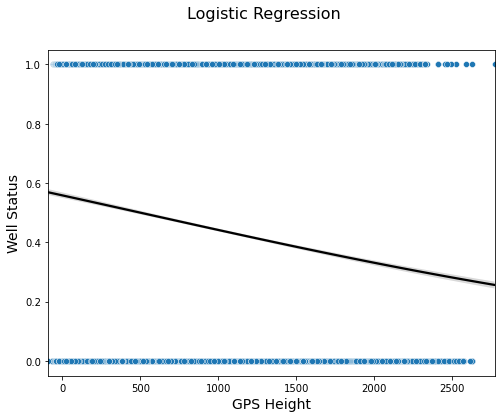

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axes object
fig.suptitle('Logistic Regression', fontsize=16)  # Add a title to the figure
sns.scatterplot(x='gps_height', y='target', data=data[(data['gps_height'] != 0)], ax=ax)  # Scatter plot of GPS height vs. target
sns.regplot(x='gps_height', y='target', data=data[(data['gps_height'] != 0)], logistic=True, scatter=False, color='black', ax=ax)  # Logistic regression line
ax.set_xlabel('GPS Height', fontsize=14)  # Set x-axis label
ax.set_ylabel('Well Status', fontsize=14)  # Set y-axis label
plt.show()  # Show the plot

In [30]:
# CONSTRUCTION YEAR
analyze_column(data, 'construction_year')

Missing Values: 0/59400

Number of Unique Values in 'construction_year': 55

Count of '0' as Placeholder for Missing Values in 'construction_year': 0

Top 20 Most Frequent Values in 'construction_year':
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
Name: construction_year, dtype: int64


In [31]:
from datetime import datetime
data['age_of_well']=datetime.now().year - data['construction_year']

data['age_of_well'].value_counts()

2024    20709
14       2645
16       2613
15       2533
24       2091
17       1587
18       1471
21       1286
13       1256
20       1123
12       1084
22       1075
46       1037
29       1014
19       1011
25        979
26        966
34        954
39        945
44        811
28        811
40        779
42        744
30        738
52        708
50        676
27        644
32        640
31        608
23        540
36        521
41        488
49        437
38        434
48        414
54        411
33        324
35        316
37        302
43        238
47        202
45        192
51        184
11        176
53        145
64        102
57         88
61         85
56         77
55         59
60         40
62         30
63         21
59         19
58         17
Name: age_of_well, dtype: int64

In [32]:
# Filtering the DataFrame 'data' to include only rows where 'construction_year', 'population', and 'gps_height' columns have values greater than 0
data = data[(data['construction_year'] > 0) & (data['population'] > 0) & (data['gps_height'] > 0)]
data.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,functional,needs repair,age_of_well
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,1,0,25
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,1,0,14
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0,1,0,15
3,67743,needs repair,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,0,1,38
10,49056,functional,0.0,2011-02-20,Private,62,Private,39.209518,-7.034139,Mzee Hokororo,...,enough,machine dbh,borehole,groundwater,other,other,0,1,0,13


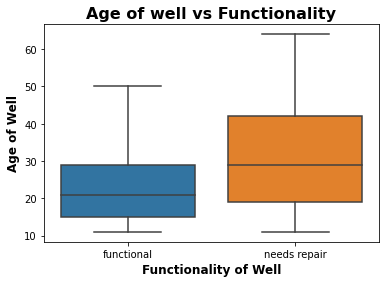

In [33]:
sns.boxplot(x='status_group',y='age_of_well', data=data, showfliers=False)
plt.xlabel('Functionality of Well', fontsize=12, fontweight='bold');
plt.ylabel('Age of Well', fontsize=12, fontweight='bold');
plt.title('Age of well vs Functionality', fontsize=16, fontweight='bold');

It is clear that the newer the well the more functional and the older the well the more repairs it needs

In [34]:
data= data.drop_duplicates()

In [35]:
#Now we can drop the columnsn not needed
to_be_dropped = ['wpt_name','id','date_recorded','recorded_by','region_code',
           'lga','scheme_name','funder','subvillage','latitude',
           'longitude','extraction_type_class','extraction_type',
           'payment_type','quantity_group','source_type','waterpoint_type_group',
           'district_code','amount_tsh','num_private','construction_year',
           'status_group','population','functional','needs repair','management'
          ]


In [36]:
#try to drop the columns not needed and also the null values
data = data.drop(to_be_dropped, axis=1)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29361 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gps_height             29361 non-null  int64 
 1   installer              29361 non-null  object
 2   basin                  29361 non-null  object
 3   region                 29361 non-null  object
 4   ward                   29361 non-null  object
 5   public_meeting         29361 non-null  object
 6   scheme_management      29361 non-null  object
 7   permit                 29361 non-null  object
 8   extraction_type_group  29361 non-null  object
 9   management_group       29361 non-null  object
 10  payment                29361 non-null  object
 11  water_quality          29361 non-null  object
 12  quality_group          29361 non-null  object
 13  quantity               29361 non-null  object
 14  source                 29361 non-null  object
 15  source_class       

# Modeling

In [37]:
X = data.drop(['target'], axis=1)  # Assigning features to X by dropping the 'target' column
y = data['target']  # Assigning the 'target' variable to y

In [38]:
# Extracting numerical columns from the feature dataset 'X' and converting them to a list
numerical_cols = list(X.select_dtypes(include=np.number).columns)

# Extracting categorical columns from the feature dataset 'X' and converting them to a list
categorical_cols = list(X.select_dtypes(exclude=np.number).columns)
print(numerical_cols, categorical_cols)


['gps_height', 'age_of_well'] ['installer', 'basin', 'region', 'ward', 'public_meeting', 'scheme_management', 'permit', 'extraction_type_group', 'management_group', 'payment', 'water_quality', 'quality_group', 'quantity', 'source', 'source_class', 'waterpoint_type']


# Preporcessing of data

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scale', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
import xgboost as xgboost

def fit_predict(model, X_train, X_test, y_train, y_test):
    '''fit pipeline using given model, and return predictions'''
    
    param_grid = model['params']
    model = model['model']
        
    
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)
                                 ])

    search = GridSearchCV(estimator=my_pipeline,
             param_grid=param_grid, n_jobs=-1, verbose=2, cv=10)
    
    search.fit(X_train, y_train)
    
    best_estimator = search.best_estimator_._final_estimator
    
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

    # Preprocessing of validation data, get predictions
    test_preds = search.predict(X_test)
    train_preds = search.predict(X_train)
    
    return test_preds, train_preds, search

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(y_true, y_preds):
    # Printing the  confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
   
    class_names = set(y) 
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();

def metrics(model_name, y_train, y_test, y_train_pred, y_test_pred):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_test_pred)
    print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')
    print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
    print('-'*60)
    print('\ntest report:\n' + classification_report(y_test, y_test_pred))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(y_train, y_train_pred))    
    print('-'*60)

In [42]:
# Calculate the smallest number of samples among the two classes
smallest_num = data['target'].value_counts().sort_values().values[0]

# Randomly sample the subset of data where the target label is 0 to match the smallest number of samples
target_0 = data[data['target'] == 0].sample(smallest_num)

# Randomly sample the subset of data where the target label is 1 to match the smallest number of samples
target_1 = data[data['target'] == 1].sample(smallest_num)

# Concatenate the sampled subsets for both target labels to create a balanced dataset
sampled_df = pd.concat([target_0, target_1])

In [43]:
def roc(X_test, y_test, pred_y, model):
    # Extracting the name of the model from the pipeline
    name = str(model.best_estimator_.named_steps["model"])[:str(model.best_estimator_.named_steps["model"]).index('(')]
    
    # Predicting probabilities for positive class
    y_pred_proba = model.predict_proba(X_test)[:,1]
    
    # Calculating true positive rate (TPR) and false positive rate (FPR)
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
    
    # Plotting ROC curve
    plt.plot(fpr, tpr, label=model)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curve for {name}')
    plt.show()


In [44]:
# Display the count of each class (0 and 1) in the 'target' column of the 'sampled_df' DataFrame
sampled_df['target'].value_counts()


1    12664
0    12664
Name: target, dtype: int64

In [45]:
# Separate the features and the target variable from the 'sampled_df' DataFrame
X_sampled_df = sampled_df.drop('target', axis=1)
y_sampled_df = sampled_df['target']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sampled_df, y_sampled_df, test_size=.3, random_state=43)

X_sampled_df.head()

,gps_height,installer,basin,region,ward,public_meeting,scheme_management,permit,extraction_type_group,management_group,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,age_of_well
42518,1327,Magadini-Makiwaru wa,Pangani,Kilimanjaro,Siha Kati,True,Water Board,True,gravity,user-group,pay monthly,soft,good,enough,spring,groundwater,communal standpipe,23
58602,895,Government,Pangani,Kilimanjaro,Makuyuni,True,VWC,True,gravity,user-group,never pay,soft,good,enough,spring,groundwater,communal standpipe,13
47597,1380,DWE,Lake Victoria,Shinyanga,Mhunze,True,WUG,False,nira/tanira,user-group,never pay,soft,good,enough,shallow well,groundwater,hand pump,19
20290,1522,wanan,Lake Nyasa,Iringa,Ibumi,True,VWC,False,gravity,user-group,pay when scheme fails,soft,good,enough,spring,groundwater,communal standpipe,17
9032,271,District Council,Ruvuma / Southern Coast,Lindi,Milola,False,WUA,False,gravity,user-group,pay per bucket,soft,good,enough,river,surface,communal standpipe,41


# Classification algorithms

# 1) Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Define logistic regression model
logistic_regression = LogisticRegression(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100]  # regularization parameter
}

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # assuming you have defined preprocessor
    ('model', logistic_regression)
])

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,  # cross-validation folds
                           scoring='accuracy',  # evaluation metric
                           n_jobs=-1  # use all available CPU cores
                          )

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Accuracy: 0.7866824582181866
ROC AUC: 0.7865869143527149
Best hyperparameters: {'model__C': 10}


/Users/myraminayokadenge/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3068  754]
 [ 867 2910]]


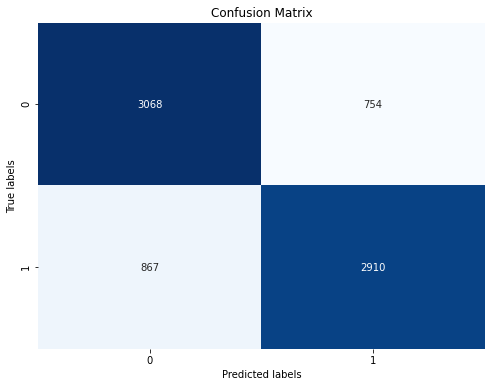

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

#we can now try plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

# 2)  XG Boost

In [50]:


from scipy import stats
import math

#Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Visual/Graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')



#Import warnings
import warnings
warnings.filterwarnings("ignore")

import pandas.util.testing as tm

In [51]:
# This function finds the top features of a model using eli5 library
def top_feat(model_pipe):
    '''This function is used to find the best features of our models
    
    Args:
        model_pipe (GridSearchCV): model_pipe is a pipeline
        
    Returns:
        the top features of the model
    '''
    
    # Extracting the one-hot encoded column names
    onehot_columns = list(model_pipe.best_estimator_.named_steps['preprocessor']
                          .named_transformers_['cat']
                          .named_steps['onehot']
                          .get_feature_names(input_features=categorical_cols))
    
    # Combining numerical and one-hot encoded column names
    numeric_features_list = list(numerical_cols)
    numeric_features_list.extend(onehot_columns)
    
    # Returning the top features using eli5 library
    return eli5.explain_weights(model_pipe.best_estimator_.named_steps['model'], top=20, feature_names=numeric_features_list)

In [52]:
xgb_param = {
    'model__eta': [.3, .2, .1, .05, .01, .005], #Learning rate
    'model__max_depth': [10], #The maximum depth of a tree.Used to control over-fitting
    'model__min_child_weight': [6], # minimum sum of weights of all observations required in a child
    'model__subsample': [0.8]      # Subsample ratio of the training instances.
}

In [53]:
# Importing XGBClassifier from xgboost library
from xgboost import XGBClassifier

# Defining the XGBClassifier model and its parameters
xgb = { 'model': XGBClassifier(random_state=42), 'params': xgb_param }

# Fitting and predicting using the XGBClassifier model
xgb_test_preds, xgb_train_preds, xgb_pipeline = fit_predict(xgb, X_train, X_test, y_train, y_test)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.7min finished


Best parameter (CV score=0.798):
{'model__eta': 0.2, 'model__max_depth': 10, 'model__min_child_weight': 6, 'model__subsample': 0.8}


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and print various metrics using the same data provided to the `metrics` function
XGBoost_accuracy = accuracy_score(y_test, xgb_test_preds)
XGBoost_precision = precision_score(y_test, xgb_test_preds)
XGBoost_recall = recall_score(y_test, xgb_test_preds)
XGBoost_f1 = f1_score(y_test, xgb_test_preds)

# Printing the calculated metrics for XGBoost
print(f"XGBoost Accuracy: {XGBoost_accuracy}")
print(f"XGBoost Precision: {XGBoost_precision}")
print(f"XGBoost Recall: {XGBoost_recall}")
print(f"XGBoost F1-score: {XGBoost_f1}")



XGBoost Accuracy: 0.7922095012501645
XGBoost Precision: 0.8015916575192097
XGBoost Recall: 0.7733651045803548
XGBoost F1-score: 0.7872254413151866


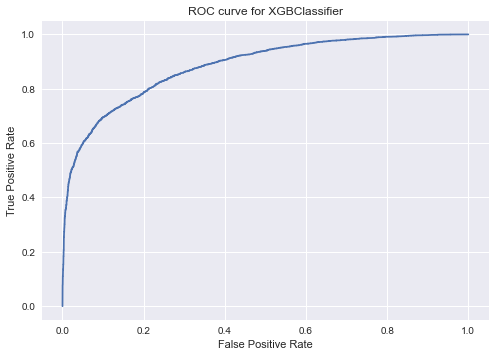

In [55]:
# Now we can Plot the ROC curve
roc(X_test, y_test, xgb_test_preds, xgb_pipeline)

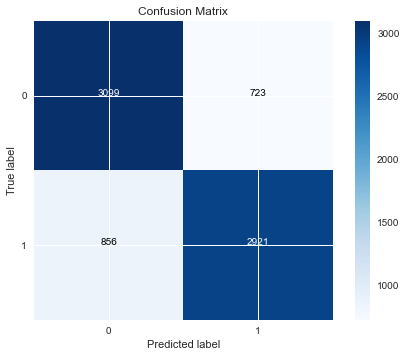

In [56]:
plot_confusion_matrix(y_test, xgb_test_preds);

# 3) Random forest classifier

A random forest is also a machine learning technique that is used to solve classification problems. It utilizes ensemble learning,which is a technique that combines many classifiers to provide solution to complex problems.

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

forest_params = {'model__n_estimators' : [500,1000],  # number of decision trees to be created
                 'model__criterion' : ['gini','entropy'], # function that is to be used for splitting
                 'model__max_depth': [10],          # maximum depth of the trees to help limit overfitting 
                 'model__min_samples_split' : [10], # minimum number of samples required in a leaf node before a split is attempted
                 'model__min_samples_leaf' : [5]} # minimum number of samples required to be at a leaf node. 
                                            # Smaller leaf size makes the model more prone to capturing noise in train data.
rfc = { 'model': RandomForestClassifier(random_state=42), 'params': forest_params }

rfc_test_preds, rfc_train_preds,rfc_pipeline = fit_predict(rfc, X_train, X_test, y_train, y_test)



Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished


Best parameter (CV score=0.749):
{'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_samples_leaf': 5, 'model__min_samples_split': 10, 'model__n_estimators': 500}


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rfc_test_preds, rfc_train_preds, rfc_pipeline = fit_predict(rfc, X_train, X_test, y_train, y_test)

random_forest_accuracy = accuracy_score(y_test, rfc_test_preds)
random_forest_precision = precision_score(y_test, rfc_test_preds)
# ... calculate other metrics

print(f"Random Forest Accuracy: {random_forest_accuracy}")
print(f"Random Forest Precision: {random_forest_precision}")
# ... print other metric values

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.5min finished


Best parameter (CV score=0.749):
{'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_samples_leaf': 5, 'model__min_samples_split': 10, 'model__n_estimators': 500}
Random Forest Accuracy: 0.7491775233583367
Random Forest Precision: 0.7622652088589852


Accuracy: 0.7491775233583367
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      3822
           1       0.76      0.72      0.74      3777

    accuracy                           0.75      7599
   macro avg       0.75      0.75      0.75      7599
weighted avg       0.75      0.75      0.75      7599



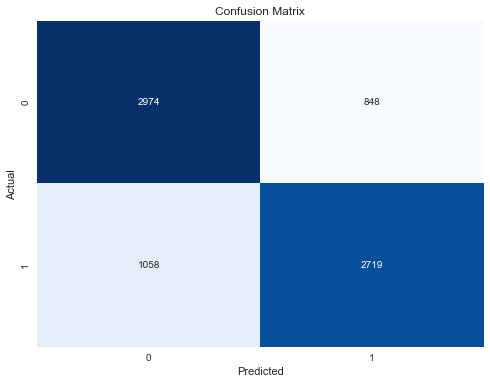

In [59]:
# Calculate accuracy
accuracy = accuracy_score(y_test, rfc_test_preds)
print(f'Accuracy: {accuracy}')

# Generate and print classification report
print('Classification Report:')
print(classification_report(y_test, rfc_test_preds))

# Generate confusion matrix
cm = confusion_matrix(y_test, rfc_test_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

# 4) Support vector machine
This is where the machine learning model kind of learns from the past input data and now predicts whatever output.

In [60]:
lsvc_parameter = { 'model__C': [1, 10], 
    'model__max_iter': [10000], # maximum number of iterations to be run.
    'model__dual':[False],  # dual=False when n_samples > n_features.
    'model__penalty': ['l1','l2'],
    }
    

In [61]:
from sklearn.svm import LinearSVC
lsvc = { 'model': LinearSVC(random_state=42), 'params': lsvc_parameter }

lsvc_test_preds, lsvc_train_preds,lsvc_pipeline = fit_predict(lsvc, X_train, X_test, y_train, y_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.8min finished


Best parameter (CV score=0.789):
{'model__C': 1, 'model__dual': False, 'model__max_iter': 10000, 'model__penalty': 'l1'}


Model: LinearSVC
------------------------------------------------------------


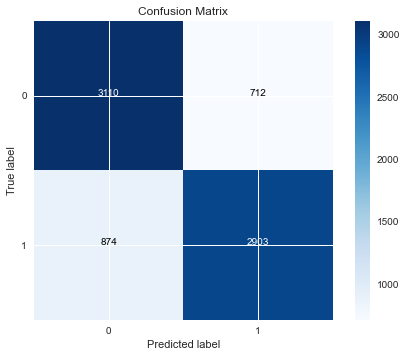

Test accuracy: 0.7912883274115016
Train accuracy: 0.8344520277511422
------------------------------------------------------------

Test report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      3822
           1       0.80      0.77      0.79      3777

    accuracy                           0.79      7599
   macro avg       0.79      0.79      0.79      7599
weighted avg       0.79      0.79      0.79      7599

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Train report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      8842
           1       0.85      0.81      0.83      8887

    accuracy                           0.83     17729
   macro avg       0.84      0.83      0.83     17729
weighted avg       0.84      0.83      0.83     17729

------------------------------------------------------------


In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    tick_marks = range(len(set(y_true)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > cm.max()/2 else 'black')
    plt.show()

def evaluate_model(model_name, y_train, y_test, y_train_pred, y_test_pred):
    print(f'Model: {model_name}')
    print('-' * 60)
    plot_confusion_matrix(y_test, y_test_pred)
    print(f'Test accuracy: {accuracy_score(y_test, y_test_pred)}')
    print(f'Train accuracy: {accuracy_score(y_train, y_train_pred)}')
    print('-' * 60)
    print('\nTest report:\n' + classification_report(y_test, y_test_pred))
    print('~' * 60)
    print('\nTrain report:\n' + classification_report(y_train, y_train_pred))
    print('-' * 60)

# Assuming you have trained a model and made predictions
# Replace lsvc_train_preds and lsvc_test_preds with your actual predictions
# Call the evaluate_model function
evaluate_model('LinearSVC', y_train, y_test, lsvc_train_preds, lsvc_test_preds)


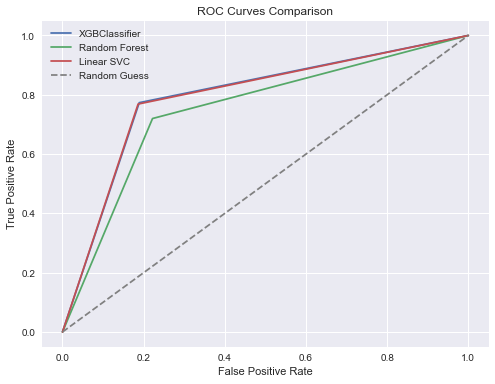

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(8, 6))
    for model_name, y_pred_proba in models.items():
        # Calculating true positive rate (TPR) and false positive rate (FPR)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        
        # Plotting ROC curve for each model
        plt.plot(fpr, tpr, label=model_name)

    # Plotting the random guess line
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the models and their corresponding predicted probabilities
models = {'XGBClassifier': xgb_test_preds,
          'Random Forest': rfc_test_preds,
          'Linear SVC': lsvc_test_preds
          }

# Plot ROC curves for the models
plot_roc_curves(models, X_test, y_test)

# Evaluation
For the random forest classifier the model achieved an accuracy of 74.5% indicating that it correctly classified about three quarter of the instances.

For class 0 (Positive class): Precision was 74% and recall was 77%, indicating that the model correctly identified 77% of the actual positive instances, and when it predicted a positive instance, it was correct about 74% of the time.
For class 1 (Negative class): Precision was 76% and recall was 72%, suggesting that the model correctly identified 72% of the actual negative instances, and when it predicted a negative instance, it was correct about 76% of the time.

It seems like our XGboost model is the most accurate with an accuracy of 80%

# Conclusion and Recommendation

Payment methods seem to be an important factor in maintenance of the wells. From the analysis it is noted that payments 'never pay', 'per bucket', and 'monthly' with 'never pay' being the most prevalent method help lead to better maintenance of the wells.

The age of the wells seems to be a contributing factor to the functionality. The older wells seem to be in need of more repairs compared to the new wells. 


Groundwater is very important to maintain the functionality of the wells. Almost, the entire water supply to the wells is dependent on groundwater. Hence we would look into different methods such as rainwater harvesting and soil conservation which would also help sustain more water in the lakes.

It is also clear that private operations and waterboards seem to have credible management of the wells as they have the highest number of functional wells and relatively lowest number of wells that need to be repaired.

We can see that having a public meeting helps in functioning of the wells. More than 50% wells are functional when there is a public meeting held for the same. Thus, Public meeting is an important factor for the functioning of wells.

Further send out designated people to inspect the pumps detected by the model and assess what needs to be done.



 